## Accessing USDA Food Data Central API for Nutritional Information

This script interacts with the USDA Food Data Central API to search for food items and retrieve nutritional information.

In [4]:
#!pip install requests
import requests

# Define your API key (it should be the actual key, not "OAS3.0:")
api_key = 'M3175TAXsEcfdKkCOpNO9VcbwjQtFOkl9rUDAiaP'

# Function to search for a food item and get its FDC ID
def search_food(query):
    #This is the data set for the USDA government
    url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    # my parameters are query for the 
    params = {
        "query": query, # search term enterd by user 
        "api_key": api_key, 
        "pageSize": 1  # Return only the top result
    }
    # using request.get() to send a get request to the API endpoint
    response = requests.get(url, params=params)
    #lines checks for the Https status and if it 200 then its okay
    if response.status_code == 200:
        # returns the json format to dictionary
        data = response.json()
        #checks for food items 
        if data['foods']:
            # this will get the first result 
            food_item = data['foods'][0]
            # return the food id and its description
            return food_item['fdcId'], food_item['description']
        else:
           #No foods were found
            print("No foods found.")
            return None, None
    else:
      # it will print out the error responce code
        print(f"Error: {response.status_code}")
        return None, None

# Function to retrieve detailed nutritional information using FDC ID
def get_food_details(fdc_id):

    url = f"https://api.nal.usda.gov/fdc/v1/food/{fdc_id}"
    params = {
        "api_key": api_key,
        "format": "full"#All available details for food
    }
    # Returns the full detail information for the food 
    response = requests.get(url, params=params)
    # Same thing as earlier 
    if response.status_code == 200:
        food_details = response.json()
        return food_details
    else:
        print(f"Error: {response.status_code}")
        return None

# whatever the user wants

foodname = str(input("Please enter the name of the object you want the nutrition data for: "))

# Example usage
if __name__ == "__main__":
    food_query = foodname
    fdc_id, description = search_food(food_query)
    
    if fdc_id:
        print(f"FDC ID: {fdc_id}, Description: {description}")
        food_details = get_food_details(fdc_id)
        
        # Print out some of the nutritional information
        if food_details:
            print(f"\nNutritional Information for {description}:")
            for nutrient in food_details.get('foodNutrients', []):
                print(f"{nutrient['nutrient']['name']}: {nutrient['amount']} {nutrient['nutrient']['unitName']}")
    else:
        print("Could not retrieve food details.")

FDC ID: 770088, Description: OREO COOKIES

Nutritional Information for OREO COOKIES:
Carbohydrate, by difference: 73.0 g
Total lipid (fat): 20.0 g
Fiber, total dietary: 2.5 g
Sodium, Na: 400.0 mg
Total Sugars: 38.0 g
Protein: 5.0 g
Fatty acids, total saturated: 9.8 g


## Extract Video Frames in Smaller Batches

1. Process multiple videos from the input folder.
2. Create a new numbered subfolder within the output folder for each video.
3. Name each subfolder with a sequential number followed by _vid.
4. Store the extracted frames as JPG files within their respective subfolders.

In [1]:
import cv2
import os

def video_to_frames_in_smaller_batches(video_folder, output_folder, desired_fps):
    print(f"Processing videos in {video_folder} to {output_folder} with {desired_fps} FPS")
    # List all video files in the selected folder
    video_files = [f for f in os.listdir(video_folder) if os.path.isfile(os.path.join(video_folder, f)) and f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

    if not video_files:
        print("No video files found in the selected folder.")
        return

    for idx, video_file in enumerate(video_files, start=1):
        video_path = os.path.join(video_folder, video_file)

        # Create a new subfolder in the output folder named <number>_vid
        video_output_folder = os.path.join(output_folder, f'{idx}_vid')
        os.makedirs(video_output_folder, exist_ok=True)

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        original_fps = cap.get(cv2.CAP_PROP_FPS)

        if original_fps <= 0:
            print(f"Warning: Unable to retrieve FPS for video {video_file}. Skipping...")
            continue

        # Calculate the frame interval to match the desired FPS
        frame_interval = int(round(original_fps / desired_fps))

        if frame_interval <= 0:
            frame_interval = 1  # Ensure at least every frame is processed

        frame_count = 0
        saved_frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Save frames at the specified interval into the specific subfolder
            if frame_count % frame_interval == 0:
                frame_filename = os.path.join(video_output_folder, f'frame_{saved_frame_count:05d}.jpg')
                cv2.imwrite(frame_filename, frame)
                saved_frame_count += 1

            frame_count += 1

        cap.release()
        print(f"Extracted frames from '{video_file}' into the folder '{video_output_folder}'.")

    print("Processing complete.")

## Video file selection

This code cell creates a graphical user interface (GUI) using Python's `tkinter` library to assist users in processing video files. The GUI guides the user through the following steps:

1. **Greeting the User**: Asks if they would like to process videos.
2. **Selecting a Video Folder**: Opens a dialog for the user to choose a folder containing video files.
3. **Handling Missing Files**: Provides help if the user cannot find the desired video folder.
4. **Prompting for Frames Per Second (FPS)**: Asks the user to input the desired frames per second (FPS) for the video processing.
5. **Selecting an Output Folder**: Prompts the user to choose or create a folder where the processed frames will be saved.
6. **Handling Default Output Folder**: If the user does not select an output folder, the program creates a default folder named `output_file` in the current working directory.
7. **Handling Duplicate Output Folders**: If a folder named `output_file` already exists, the program notifies the user and terminates to avoid conflicts.
8. **Processing the Videos**: Processes the videos by extracting frames at the specified FPS and saves them in the output folder.



In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog


# Function to handle when the user can't find their file (to be implemented)
def handle_cant_find_file():
    # Placeholder for the file search assistance logic
    messagebox.showinfo("Help", "Please check your folder structure and try again.")



def greet_and_prompt():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    # Greet the user
    user_response = messagebox.askquestion("Welcome", "Hello! Would you like to process videos?")

    if user_response == 'yes':
        while True:
            # Ask the user to select the folder containing video files
            video_folder = filedialog.askdirectory(title="Select the Folder Containing Videos")

            if video_folder:
                break  # Break the loop if a folder is selected
            else:
                # Option for the user if they can't find the folder
                cant_find_response = messagebox.askquestion("Can't Find Folder",
                                                            "Can't find your folder? Would you like some help?",
                                                            icon='warning')
                if cant_find_response == 'yes':
                    handle_cant_find_file()
                else:
                    messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                    root.update()  # Process any pending events
                    root.quit()  # Exit the main loop
                    root.destroy()  # Destroy the Tkinter root window
                    return  # Exit the function and stop the script

        # Prompt the user to select the output folder
        select_output_response = messagebox.askquestion("Output Folder", "Would you like to select an output folder now?")
        
        if select_output_response == 'yes':
            while True:
                output_folder = filedialog.askdirectory(title="Select Output Folder")

                if output_folder:
                    messagebox.showinfo("Folder Selected", f"Output folder selected: {output_folder}")
                    break  # Proceed if a valid output folder is selected
                else:
                    # Notify the user to select a folder or quit the process
                    retry_response = messagebox.askquestion("No Folder Selected",
                                                            "You haven't selected an output folder. Would you like to try again?",
                                                            icon='warning')
                    if retry_response == 'no':
                        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                        root.update()  # Process any pending events
                        root.quit()  # Exit the main loop
                        root.destroy()  # Destroy the Tkinter root window
                        return  # Exit the function and stop the script
        else:
            messagebox.showinfo("Goodbye", "You chose not to select an output folder. Goodbye!")
            root.update()  # Process any pending events
            root.quit()  # Exit the main loop
            root.destroy()  # Destroy the Tkinter root window
            return  # Exit the function and stop the script

        # Ask the user to input the frames per second (FPS)
        fps = simpledialog.askinteger("Frames Per Second", "Please enter the frames per second (FPS) value:", minvalue=1)

        if fps:
            # Call the function with the gathered information
            video_to_frames_in_smaller_batches(video_folder, output_folder, int(fps))
            messagebox.showinfo("Process Complete", f"Videos processed with {fps} frames per second.")
        else:
            messagebox.showinfo("No FPS Entered", "You didn't enter a valid FPS value. Goodbye!")
    
    else:
        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
    
    root.update()  # Process any pending events
    root.quit()  # Exit the main loop
    root.destroy()  # Destroy the Tkinter root window


# Call the function
if __name__ == "__main__":
    greet_and_prompt()


Processing videos in /Users/taneshafuller/Desktop/FinalProductDataset to /Users/taneshafuller/Desktop/output with 15 FPS
Extracted frames from '7456507-uhd_2160_3840_30fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/1_vid'.
Extracted frames from '5900834-uhd_2160_4096_25fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/2_vid'.
Extracted frames from '10039761-hd_1920_1080_24fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/3_vid'.
Extracted frames from '4055809-hd_1080_1920_30fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/4_vid'.
Extracted frames from '3296289-uhd_4096_2160_25fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/5_vid'.
Extracted frames from '8354399-uhd_3840_2160_30fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/6_vid'.
Extracted frames from '8801820-uhd_2160_3840_24fps.mp4' into the folder '/Users/taneshafuller/Desktop/output/7_vid'.
Extracted frames from '4752341-hd_1920_1080_30fps.mp4' into t

## Video segmentation with SAM 2
This notebook shows how to use SAM 2 for interactive segmentation in videos. It will cover the following:

- adding clicks (or box) on a frame to get and refine _masklets_ (spatio-temporal masks)
- propagating clicks (or box) to get _masklets_ throughout the video
- segmenting and tracking multiple objects at the same time

We use the terms _segment_ or _mask_ to refer to the model prediction for an object on a single frame, and _masklet_ to refer to the spatio-temporal masks across the entire video. 

## Annotating Images with Bounding Boxes for Object Detection

This script helps annotate objects in images by drawing bounding boxes and saving them as training labels for models.
If running locally using jupyter, first install `segment-anything-2` in your environment using the [installation instructions](https://github.com/facebookresearch/segment-anything-2#installation) in the repository.


## Set env for SAM2 

In [3]:
using_colab = False
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything-2.git'

    !mkdir -p videos
    !wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
    !unzip -d videos videos/bedroom.zip

    !mkdir -p ../checkpoints/
    !wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

    

In [4]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: mps

Support for MPS devices is preliminary. SAM 2 is trained with CUDA and might give numerically different outputs and sometimes degraded performance on MPS. See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion.


## Loading SAM2 Video Predictor

In [6]:
from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

In [7]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

## Select an example video

IT is assumend that the video is stored as a list of j peg frames

In [8]:
import tkinter as tk
from tkinter import filedialog, messagebox

# Global variable to store the selected directory
selected_directory = None

# Function to pick a video directory
def pick_directory():
    global selected_directory
    selected_directory = filedialog.askdirectory(title="Select Video Directory")
    if selected_directory:
        label_var.set(f"Stored Directory: {selected_directory}")
    else:
        label_var.set("No directory/folder stored")

# Function to greet the user and provide instructions
def greet_user():
    messagebox.showinfo("Greeting", "Hello! Please select the video directory to store.")

# Function to perform some action with the selected directory
def use_selected_directory():
    if selected_directory:
        print(f"Using directory: {selected_directory}")
        # Here you can add the logic to use the selected directory
    else:
        print("No directory selected to use.")

if __name__ == "__main__":
    # Initialize the Tkinter window
    root = tk.Tk()
    root.title("Video Directory Picker")

    # Greeting the user
    greet_user()

    # Label to display the stored directory or status
    label_var = tk.StringVar()
    label_var.set("No directory/folder stored")

    label = tk.Label(root, textvariable=label_var, font=("Arial", 12))
    label.pack(pady=20)

    # Button to open the directory picker
    button = tk.Button(root, text="Pick Video Directory", command=pick_directory, font=("Arial", 12))
    button.pack(pady=20)

    # Button to use the selected directory in some way
    use_button = tk.Button(root, text="Use Selected Directory", command=use_selected_directory, font=("Arial", 12))
    use_button.pack(pady=20)

    # Run the Tkinter event loop
    root.mainloop()

    # After the Tkinter loop ends, you can still access the selected_directory
    if selected_directory:
        print(f"Final selected directory: {selected_directory}")
    else:
        print("No directory was selected.")


Using directory: /Users/taneshafuller/Desktop/output/1_vid
Using directory: /Users/taneshafuller/Desktop/output/1_vid
Final selected directory: /Users/taneshafuller/Desktop/output/1_vid


## Renamed the file so it can be ordered 

In [9]:
import os
from PIL import Image

video_dir = selected_directory

# Scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1].lower() in [".jpg", ".jpeg"]
]

# Rename files by removing the 'frame_' prefix
for frame_name in frame_names:
    new_name = frame_name.replace('frame_', '')
    os.rename(os.path.join(video_dir, frame_name), os.path.join(video_dir, new_name))

print("Renaming completed. Files should now be in the correct format.")

Renaming completed. Files should now be in the correct format.


## Initialize the inference state
Preparing SAM2 for performing task like video segmentation

In [10]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 164/164 [00:23<00:00,  6.92it/s]
/opt/anaconda3/lib/python3.12/site-packages/torch/nn/functional.py:4095: UserWarning: The operator 'aten::upsample_bicubic2d.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.upsample_bicubic2d(input, output_size, align_corners, scale_factors)


### Example 1: Segment & track one object

Note: if you have run any previous tracking using this `inference_state`, please reset it first via `reset_state`.

(The cell below is just for illustration; it's not needed to call `reset_state` here as this `inference_state` is just freshly initialized above.)

In [11]:
predictor.reset_state(inference_state)

#### Step 1: Add a first click on a frame

In [12]:
print(selected_directory)

/Users/taneshafuller/Desktop/output/1_vid


In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = selected_directory

# Extract the numeric part from the filenames for sorting
frame_names.sort(key=lambda p: int(''.join(filter(str.isdigit, os.path.splitext(p)[0]))))

def on_click(event):
    # Get the coordinates of the click
    x, y = event.x, event.y
    print(f"Clicked at: ({x}, {y})")

def load_image(image_path, max_size=(300, 200)):
    # Load the image using PIL
    image = Image.open(image_path)
    # Resize image to fit within the frame while maintaining aspect ratio
    image.thumbnail(max_size, Image.LANCZOS)
    return ImageTk.PhotoImage(image)

# Create the main window
root = tk.Tk()
root.title("Click Coordinates on Image")

# Set a specific size for the frame
frame_width = 400
frame_height = 300

# Load the first image and resize it to fit the frame
frame_name = os.path.join(video_dir, frame_names[0])
photo = load_image(frame_name, max_size=(frame_width, frame_height))

# Create a label to display the image
label = tk.Label(root, image=photo)
label.image = photo  # Keep a reference to avoid garbage collection
label.pack()

# Bind the left mouse button click event to the label (where the image is displayed)
label.bind("<Button-1>", on_click)

# Function to update the image (if you need to change images later)
def update_image(new_image_path):
    global photo
    photo = load_image(new_image_path, max_size=(frame_width, frame_height))
    label.config(image=photo)
    label.image = photo  # Keep a reference to avoid garbage collection

# Start the main event loop
root.mainloop()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/taneshafuller/Desktop/output/1_vid/frame_00000.jpg'

## Same Concept As Above, trying to use Matplot to click on Objects

In [14]:
import tkinter as tk
from PIL import Image, ImageTk
import os

# Replace this with the directory where your images are located
video_dir = selected_directory 
frame_names = sorted([f for f in os.listdir(video_dir) if f.endswith('.jpg') or f.endswith('.jpeg')])

def on_click(event):
    # Get the coordinates of the click
    x, y = event.x, event.y
    print(f"Clicked at: ({x}, {y})")

# Create the main window
root = tk.Tk()
root.title("Click Coordinates on Image")

# Load the image using PIL
frame_name = os.path.join(video_dir, frame_names[0])  # Use the first image in the directory
image = Image.open(frame_name)
photo = ImageTk.PhotoImage(image)

# Create a frame within the window with the same size as the image
frame = tk.Frame(root, width=image.width, height=image.height)
frame.pack()

# Create a label to display the image
label = tk.Label(frame, image=photo)
label.image = photo  # Keep a reference to avoid garbage collection
label.pack()

# Bind the left mouse button click event to the label (where the image is displayed)
label.bind("<Button-1>", on_click)

# Start the main event loop
root.mainloop()



TclError: image "pyimage1" doesn't exist

# Dont worry for now

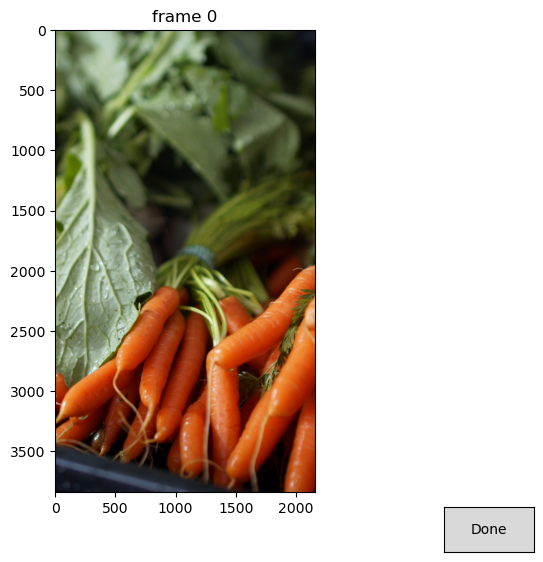

In [18]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Set up initial variables
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integer)
video_dir = selected_directory # your video directory
frame_names = sorted([f for f in os.listdir(video_dir) if f.endswith('.jpg') or f.endswith('.jpeg')])

# Initial empty points and labels
points = np.empty((0, 2), dtype=np.float32)
labels = np.empty((0,), dtype=np.int32)

# Global variables for state
out_mask_logits = None

# Function to be called on mouse click
def on_click(event):
    global points, labels, ann_obj_id, out_mask_logits
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        print(f"Clicked at ({x}, {y})")
        
        # Add the click point
        points = np.append(points, [[x, y]], axis=0)
        labels = np.append(labels, [1])  # Add positive click by default

        # Update segmentation after each click
        update_segmentation()

def update_segmentation():
    global points, labels, ann_obj_id, ann_frame_idx, inference_state, out_obj_ids, out_mask_logits
    
    # Call the predictor to get the segmentation mask
    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
        inference_state=inference_state,
        frame_idx=ann_frame_idx,
        obj_id=ann_obj_id,
        points=points,
        labels=labels,
    )
    
    # Clear previous plot and show updated frame
    ax.clear()
    ax.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
    show_points(points, labels, ax)
    show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), ax, obj_id=out_obj_ids[0])
    fig.canvas.draw_idle()  # Update the figure

# Function to be called when "Done" button is pressed
def on_done(event):
    global out_mask_logits
    # Store the final mask (for example, you could save it or process it further)
    final_mask = (out_mask_logits[0] > 0.0).cpu().numpy()
    print("Final mask stored.")
    # Here, you could save the final mask to a file or perform further processing
    plt.close(fig)

# Display the initial frame to click on
fig, ax = plt.subplots(figsize=(9, 6))
ax.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
plt.title(f"frame {ann_frame_idx}")

# Connect the click event to the on_click function
fig.canvas.mpl_connect('button_press_event', on_click)

# Add a "Done" button to finalize the mask
done_ax = plt.axes([0.8, 0.01, 0.1, 0.075])  # Position of the button
done_button = Button(done_ax, 'Done')
done_button.on_clicked(on_done)

# Display the frame and keep the plot open for interaction
plt.show()


In [21]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import os
import matplotlib.pyplot as plt

# Function to access the first jpg frame of the video folder
def access_first_frame(video_dir):
    files = [f for f in os.listdir(video_dir) if f.endswith('.jpg')]
    if not files:
        print("No JPG files found in the directory.")
        return None
    first_frame_path = os.path.join(video_dir, files[0])
    return first_frame_path

# Function to handle single clicks (adding a coordinate)
def on_single_click(event, canvas, coordinates):
    x, y = event.x, event.y
    clicked_coord = (x, y)
    
    if clicked_coord not in coordinates:
        coordinates.append(clicked_coord)
        print(f"Clicked coordinates: {coordinates}")
        # Mark the coordinate on the canvas
        canvas.create_oval(x-5, y-5, x+5, y+5, outline="red", width=2)

# Function to handle double clicks (removing a coordinate)
def on_double_click(event, canvas, coordinates, video_dir):
    x, y = event.x, event.y
    clicked_coord = (x, y)
    
    if clicked_coord in coordinates:
        coordinates.remove(clicked_coord)
        print(f"Coordinate {clicked_coord} was deleted.")
        # Clear the canvas and redraw the image with the updated coordinates
        display_image(video_dir, canvas, coordinates)

# Function to display the first frame on the canvas
def display_image(video_dir, canvas, coordinates):
    first_frame_path = access_first_frame(video_dir)
    if not first_frame_path:
        return

    img = Image.open(first_frame_path)
    img.thumbnail((800, 600))  # Adjust thumbnail size as needed
    img_tk = ImageTk.PhotoImage(img)

    canvas.delete("all")
    canvas.image = img_tk  # Keep a reference to avoid garbage collection
    canvas.create_image(0, 0, anchor=tk.NW, image=img_tk)

    # Redraw existing coordinates on the image
    for coord in coordinates:
        canvas.create_oval(coord[0]-5, coord[1]-5, coord[0]+5, coord[1]+5, outline="red", width=2)

# Function to handle the "Done" button click
def on_done(coordinates):
    print(f"Final coordinates: {coordinates}")

# Main function to set up the GUI
def main():
    root = tk.Tk()
    root.title("Image Clicker")

    video_dir = filedialog.askdirectory(title="Select Video Frame Directory")
    if not video_dir:
        print("No directory selected.")
        return

    canvas = tk.Canvas(root, width=800, height=600)
    canvas.pack()

    coordinates = []

    # Bind single-click (Button-1) to add a coordinate
    canvas.bind("<Button-1>", lambda event: on_single_click(event, canvas, coordinates))
    # Bind double-click (Double-1) to remove a coordinate
    canvas.bind("<Double-1>", lambda event: on_double_click(event, canvas, coordinates, video_dir))

    display_image(video_dir, canvas, coordinates)

    done_button = tk.Button(root, text="Done", command=lambda: on_done(coordinates))
    done_button.pack()

    root.mainloop()

# Run the main function
main()


Clicked coordinates: [(193, 243)]
Clicked coordinates: [(193, 243), (201, 229)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251), (259, 259)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251), (259, 259), (267, 271)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251), (259, 259), (267, 271), (274, 281)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251), (259, 259), (267, 271), (274, 281), (284, 295)]
Clicked coordinates: [(193, 243), (201, 229), (219, 224), (232, 232), (243, 241), (250, 251), (259, 259), (267, 271), (2

#### Step 2: Add a second click to refine the prediction

Hmm, it seems that although we wanted to segment the child on the left, the model predicts the mask for only the shorts -- this can happen since there is ambiguity from a single click about what the target object should be. We can refine the mask on this frame via another positive click on the child's shirt.

Here we make a **second positive click** at (x, y) = (250, 220) with label `1` to expand the mask.

Note: we need to send **all the clicks and their labels** (i.e. not just the last click) when calling `add_new_points_or_box`.

In [ ]:
nn_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

# Let's add a 2nd positive click at (x, y) = (250, 220) to refine the mask
# sending all clicks (and their labels) to `add_new_points_or_box`
points = np.array([[210, 350], [250, 220]], dtype=np.float32)
# for labels, `1` means positive click and `0` means negative click
labels = np.array([1, 1], np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())